In [14]:
import geopandas as gpd
from shapely import wkt
from collections import defaultdict
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
def normalize_point(pt, ndigits=7):
    x, y = pt  
    return (round(x, ndigits), round(y, ndigits))

In [3]:
df = gpd.pd.read_csv("streets.csv").drop(columns = ["Unnamed: 0"])

In [4]:
df.columns

Index(['id', 'nomoficial', 'map_name', 'street_type', 'disance', 'direction',
       'bicycle_road', 'neightborhood', 'geometry'],
      dtype='object')

In [5]:
# Change to WTK Object
df["geometry"] = df["geometry"].apply(wkt.loads)

In [6]:
# Street Graph represented by adjacency list
street_graph = defaultdict(list)   
edges = {}                 

In [7]:
# Fill graph

for idx, row in df.iterrows():
    geom = row["geometry"]
    start = normalize_point(geom.coords[0])   # First lat,long point
    end   = normalize_point(geom.coords[-1])  # Last lat,long point

    try:
        direction = row["direction"].lower().strip()
    except:
        direction = row["direction"]

    edge_attrs = {
            "map_name": row["map_name"]
        }
    edges[row["id"]] = edge_attrs

# Directions
    if direction == "CRECIENTE":
        street_graph[start].append((end, row["id"]))
    elif direction == "DECRECIENTE":
        street_graph[end].append((start, row["id"]))
    else:  # Two-Way road
        street_graph[start].append((end, row["id"]))
        street_graph[end].append((start, row["id"]))

In [8]:

# === 4. Resultado ===
print("Nodos:", len(street_graph))
print("Arcos:", len(edges))

Nodos: 18151
Arcos: 31956


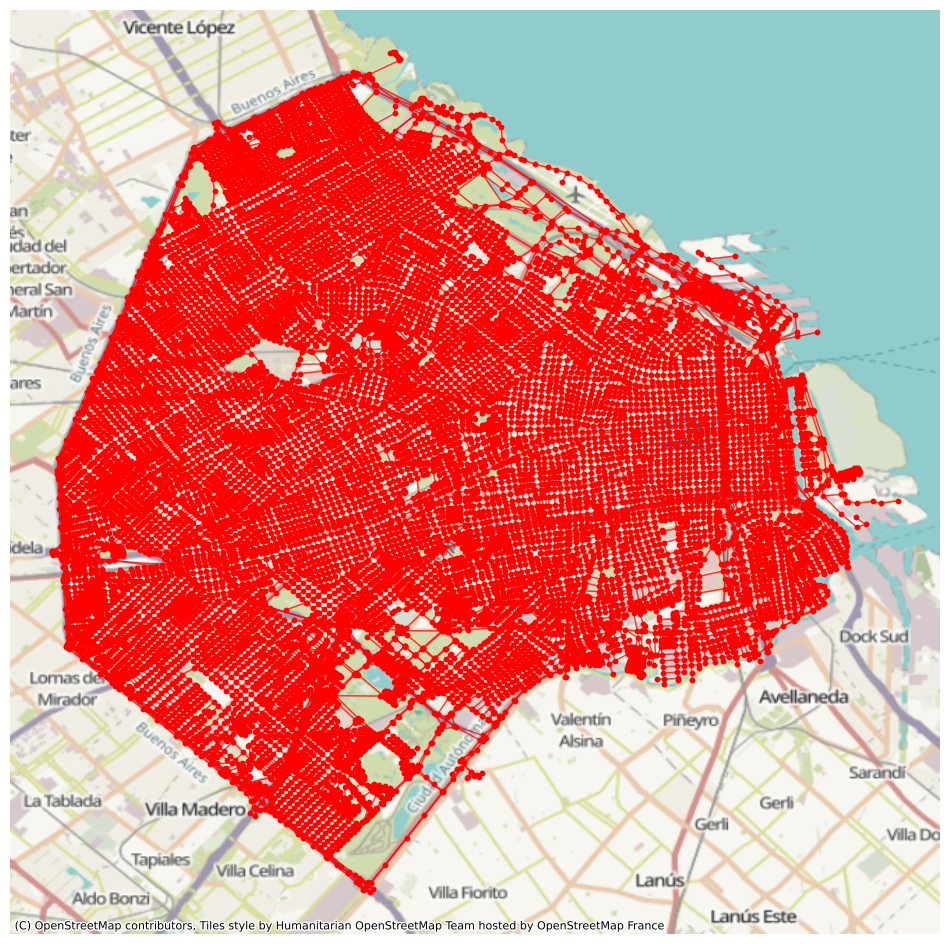

In [15]:
# 1. Extraer nodos
nodes = list(street_graph.keys())
x_nodes, y_nodes = zip(*nodes)

# 2. Crear figura
fig, ax = plt.subplots(figsize=(12, 12))

# 3. Dibujar aristas del grafo
for u, neighbors in street_graph.items():
    for v, edge_id in neighbors:
        ax.plot([u[0], v[0]], [u[1], v[1]], color="red", alpha=0.5, linewidth=1)

# 4. Dibujar nodos
ax.scatter(x_nodes, y_nodes, s=10, color="red")

# 5. Agregar mapa base
ctx.add_basemap(ax, crs="EPSG:4326")  # asumiendo que tu grafo usa lon/lat

# 6. Ajustes finales
ax.set_axis_off()
plt.show()